In [1]:
import numpy 
numpy.random.seed(1337)

In [2]:
import h5py
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, Input, MaxPooling2D, Dropout
from keras.layers import Conv2D, Embedding
from keras.optimizers import SGD, rmsprop
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score, f1_score, precision_score, recall_score
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder
from keras.layers.advanced_activations import LeakyReLU, PReLU, ELU
from keras_contrib.layers.advanced_activations import PELU, SReLU

c:\users\sumayyah\keras\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
batch_size=128 
num_classes=37
epochs=100

In [4]:
import os
from PIL import Image
import matplotlib.image as mpimg

In [5]:
os.chdir("E:");
path="E:/Dataset_Final(March)/One";
classes=os.listdir(path)
x=[]#Datapoints 
y=[]#labels 
for fol in classes:
    imgfiles=os.listdir(path+u'\\'+fol);
    for img in imgfiles:
        im=mpimg.imread(path+u'\\'+fol+u'\\'+img);
        x.append(im)
        y.append(fol)
x=numpy.array(x)
y=numpy.array(y)

In [6]:
print(x.shape)
print(y.shape)
x=x.reshape((-1,100,100,1))

(144, 100, 100)
(144,)


In [7]:
n=x.shape[0]
randomize=numpy.arange(n)
numpy.random.shuffle(randomize)
randomize
x=x[randomize]
y=y[randomize]

In [8]:
test_split=round(n*2/3)
x_train=x[:test_split]
y_train=y[:test_split]
x_test=x[test_split:]
y_test=y[test_split:]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(96, 100, 100, 1)
(96,)
(48, 100, 100, 1)
(48,)


In [9]:
y_train=keras.utils.to_categorical(y_train, num_classes)
y_test=keras.utils.to_categorical(y_test, num_classes)
y_train[:1]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]])

In [10]:
# inputs=Input(shape=(100,100,1))
# x=Conv2D(64, (3, 3), padding='same')(inputs)
# x=SReLU()(x)
# x=MaxPooling2D(pool_size=(2,2))(x)
# x=Conv2D(16, (3, 3), padding='same')(x)
# x=SReLU()(x)
# x=MaxPooling2D(pool_size=(2,2))(x)

# x=Dropout(0.2)(x)#---------------------------------------------->0.5208(Epoch_101)
# x=Dense(num_classes)(x)
# x=SReLU()(x)
# x=Flatten()(x)
# x=Dense(num_classes)(x)

# output=Activation('softmax')(x)
# model=Model([inputs], output)

In [40]:
inputs=Input(shape=(100,100,1))
x=Conv2D(128, (3, 3), padding='same')(inputs)
x=SReLU()(x)
x=MaxPooling2D(pool_size=(2,2))(x)
x=Conv2D(32, (3, 3), padding='same')(x)
x=SReLU()(x)
x=MaxPooling2D(pool_size=(2,2))(x)
# x=Conv2D(7, (3, 3), padding='same')(x)
# x=SReLU()(x)
# x=MaxPooling2D(pool_size=(2,2))(x)

x=Dropout(0.2)(x)#---------------------------------------------->0.(Epoch_102)
x=Dense(num_classes)(x)
x=SReLU()(x)
x=Flatten()(x)
x=Dense(num_classes)(x)

output=Activation('softmax')(x)
model=Model([inputs], output)

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 100, 100, 1)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 100, 100, 128)     1280      
_________________________________________________________________
s_re_lu_11 (SReLU)           (None, 100, 100, 128)     5120000   
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 50, 50, 32)        36896     
_________________________________________________________________
s_re_lu_12 (SReLU)           (None, 50, 50, 32)        320000    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 25, 25, 32)        0         
__________

In [42]:
opt=keras.optimizers.Adam(lr=1e-3)

In [43]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [44]:
import h5py
from keras.callbacks import ModelCheckpoint
filepath='E:Dataset_Final(March)/Checkpoints/Level_1/Epoch_102/weights-improvement-{epoch:2d}-{val_acc:.2f}.hdf5'
checkpoint=ModelCheckpoint(filepath, monitor='val_acc', verbose=1, mode='max')

In [45]:
hist=model.fit(x_train, y_train, 
               batch_size=batch_size,
               epochs=epochs,
               validation_data=(x_test, y_test),
               callbacks=[checkpoint]
               )

Train on 96 samples, validate on 48 samples
Epoch 1/100

Epoch 00001: saving model to E:Dataset_Final(March)/Checkpoints/Level_1/Epoch_102/weights-improvement- 1-0.04.hdf5
96/96 [==============================] - 42s 437ms/step - loss: 3.6128 - acc: 0.0312 - val_loss: 3.6059 - val_acc: 0.0417
Epoch 2/100

Epoch 00002: saving model to E:Dataset_Final(March)/Checkpoints/Level_1/Epoch_102/weights-improvement- 2-0.02.hdf5
96/96 [==============================] - 34s 354ms/step - loss: 3.5753 - acc: 0.2500 - val_loss: 3.6166 - val_acc: 0.0208
Epoch 3/100

Epoch 00003: saving model to E:Dataset_Final(March)/Checkpoints/Level_1/Epoch_102/weights-improvement- 3-0.02.hdf5
96/96 [==============================] - 34s 356ms/step - loss: 3.5281 - acc: 0.1875 - val_loss: 3.6656 - val_acc: 0.0208
Epoch 4/100

Epoch 00004: saving model to E:Dataset_Final(March)/Checkpoints/Level_1/Epoch_102/weights-improvement- 4-0.02.hdf5
96/96 [==============================] - 34s 358ms/step - loss: 3.4470 - acc: 

96/96 [==============================] - 33s 346ms/step - loss: 0.6288 - acc: 0.7396 - val_loss: 1.4646 - val_acc: 0.5000
Epoch 34/100

Epoch 00034: saving model to E:Dataset_Final(March)/Checkpoints/Level_1/Epoch_102/weights-improvement-34-0.54.hdf5
96/96 [==============================] - 32s 332ms/step - loss: 0.5213 - acc: 0.7188 - val_loss: 1.5123 - val_acc: 0.5417
Epoch 35/100

Epoch 00035: saving model to E:Dataset_Final(March)/Checkpoints/Level_1/Epoch_102/weights-improvement-35-0.50.hdf5
96/96 [==============================] - 34s 350ms/step - loss: 0.5671 - acc: 0.7083 - val_loss: 1.7569 - val_acc: 0.5000
Epoch 36/100

Epoch 00036: saving model to E:Dataset_Final(March)/Checkpoints/Level_1/Epoch_102/weights-improvement-36-0.50.hdf5
96/96 [==============================] - 33s 349ms/step - loss: 0.5629 - acc: 0.6979 - val_loss: 1.7541 - val_acc: 0.5000
Epoch 37/100

Epoch 00037: saving model to E:Dataset_Final(March)/Checkpoints/Level_1/Epoch_102/weights-improvement-37-0.50.h

ResourceExhaustedError: OOM when allocating tensor with shape[96,100,100,128] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[Node: training_3/Adam/gradients/s_re_lu_11/LeakyRelu/Maximum_grad/Select = Select[T=DT_FLOAT, _class=["loc:@s_re_lu_11/LeakyRelu/Maximum"], _device="/job:localhost/replica:0/task:0/device:CPU:0"](training_3/Adam/gradients/s_re_lu_11/LeakyRelu/Maximum_grad/GreaterEqual, training_3/Adam/gradients/s_re_lu_11/Minimum_grad/Reshape, training_3/Adam/gradients/s_re_lu_11/LeakyRelu/Maximum_grad/zeros)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Caused by op 'training_3/Adam/gradients/s_re_lu_11/LeakyRelu/Maximum_grad/Select', defined at:
  File "e:\anaconda3\Lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "e:\anaconda3\Lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\users\sumayyah\keras\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\users\sumayyah\keras\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "c:\users\sumayyah\keras\lib\site-packages\ipykernel\kernelapp.py", line 478, in start
    self.io_loop.start()
  File "c:\users\sumayyah\keras\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "c:\users\sumayyah\keras\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "c:\users\sumayyah\keras\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "c:\users\sumayyah\keras\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "c:\users\sumayyah\keras\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "c:\users\sumayyah\keras\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "c:\users\sumayyah\keras\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "c:\users\sumayyah\keras\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "c:\users\sumayyah\keras\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "c:\users\sumayyah\keras\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "c:\users\sumayyah\keras\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "c:\users\sumayyah\keras\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "c:\users\sumayyah\keras\lib\site-packages\IPython\core\interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "c:\users\sumayyah\keras\lib\site-packages\IPython\core\interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "c:\users\sumayyah\keras\lib\site-packages\IPython\core\interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-45-876c02652090>", line 5, in <module>
    callbacks=[checkpoint]
  File "c:\users\sumayyah\keras\lib\site-packages\keras\engine\training.py", line 1646, in fit
    self._make_train_function()
  File "c:\users\sumayyah\keras\lib\site-packages\keras\engine\training.py", line 970, in _make_train_function
    loss=self.total_loss)
  File "c:\users\sumayyah\keras\lib\site-packages\keras\legacy\interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "c:\users\sumayyah\keras\lib\site-packages\keras\optimizers.py", line 434, in get_updates
    grads = self.get_gradients(loss, params)
  File "c:\users\sumayyah\keras\lib\site-packages\keras\optimizers.py", line 78, in get_gradients
    grads = K.gradients(loss, params)
  File "c:\users\sumayyah\keras\lib\site-packages\keras\backend\tensorflow_backend.py", line 2512, in gradients
    return tf.gradients(loss, variables, colocate_gradients_with_ops=True)
  File "c:\users\sumayyah\keras\lib\site-packages\tensorflow\python\ops\gradients_impl.py", line 609, in gradients
    grad_scope, op, func_call, lambda: grad_fn(op, *out_grads))
  File "c:\users\sumayyah\keras\lib\site-packages\tensorflow\python\ops\gradients_impl.py", line 375, in _MaybeCompile
    return grad_fn()  # Exit early
  File "c:\users\sumayyah\keras\lib\site-packages\tensorflow\python\ops\gradients_impl.py", line 609, in <lambda>
    grad_scope, op, func_call, lambda: grad_fn(op, *out_grads))
  File "c:\users\sumayyah\keras\lib\site-packages\tensorflow\python\ops\math_grad.py", line 904, in _MaximumGrad
    return _MaximumMinimumGrad(op, grad, math_ops.greater_equal)
  File "c:\users\sumayyah\keras\lib\site-packages\tensorflow\python\ops\math_grad.py", line 894, in _MaximumMinimumGrad
    xgrad = array_ops.where(xmask, grad, zeros)
  File "c:\users\sumayyah\keras\lib\site-packages\tensorflow\python\ops\array_ops.py", line 2540, in where
    return gen_math_ops._select(condition=condition, x=x, y=y, name=name)
  File "c:\users\sumayyah\keras\lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 4528, in _select
    "Select", condition=condition, t=x, e=y, name=name)
  File "c:\users\sumayyah\keras\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "c:\users\sumayyah\keras\lib\site-packages\tensorflow\python\framework\ops.py", line 3160, in create_op
    op_def=op_def)
  File "c:\users\sumayyah\keras\lib\site-packages\tensorflow\python\framework\ops.py", line 1625, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

...which was originally created as op 's_re_lu_11/LeakyRelu/Maximum', defined at:
  File "e:\anaconda3\Lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
[elided 18 identical lines from previous traceback]
  File "c:\users\sumayyah\keras\lib\site-packages\IPython\core\interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-40-0d2f2276bec7>", line 3, in <module>
    x=SReLU()(x)
  File "c:\users\sumayyah\keras\lib\site-packages\keras\engine\topology.py", line 617, in __call__
    output = self.call(inputs, **kwargs)
  File "c:\users\sumayyah\keras\lib\site-packages\keras_contrib\layers\advanced_activations.py", line 223, in call
    t_right_actual - t_left)
  File "c:\users\sumayyah\keras\lib\site-packages\keras\backend\tensorflow_backend.py", line 2918, in relu
    x = tf.nn.leaky_relu(x, alpha)
  File "c:\users\sumayyah\keras\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1548, in leaky_relu
    return math_ops.maximum(alpha * features, features)
  File "c:\users\sumayyah\keras\lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 2887, in maximum
    "Maximum", x=x, y=y, name=name)
  File "c:\users\sumayyah\keras\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "c:\users\sumayyah\keras\lib\site-packages\tensorflow\python\framework\ops.py", line 3160, in create_op
    op_def=op_def)
  File "c:\users\sumayyah\keras\lib\site-packages\tensorflow\python\framework\ops.py", line 1625, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[96,100,100,128] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[Node: training_3/Adam/gradients/s_re_lu_11/LeakyRelu/Maximum_grad/Select = Select[T=DT_FLOAT, _class=["loc:@s_re_lu_11/LeakyRelu/Maximum"], _device="/job:localhost/replica:0/task:0/device:CPU:0"](training_3/Adam/gradients/s_re_lu_11/LeakyRelu/Maximum_grad/GreaterEqual, training_3/Adam/gradients/s_re_lu_11/Minimum_grad/Reshape, training_3/Adam/gradients/s_re_lu_11/LeakyRelu/Maximum_grad/zeros)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.



In [16]:
score=model.evaluate(x_test, y_test)

48/48 [==============================] - 2s 36ms/step


In [17]:
score[1]

0.5

In [18]:
y_pred=model.predict(x_test)# for dataset of 12 characters
print (y_pred)
y_pred=numpy.argmax(y_pred, axis=1)
print (y_pred)

[[2.94713150e-15 2.14662532e-09 1.70969159e-11 ... 2.00195354e-03
  9.19864007e-08 2.72958427e-11]
 [4.48768135e-15 3.68956316e-05 1.37981804e-08 ... 5.73652287e-05
  2.21351511e-04 4.90789603e-07]
 [1.10384114e-14 7.62660534e-07 1.29510340e-07 ... 3.51367760e-07
  9.98131216e-01 2.39886688e-08]
 ...
 [1.91567767e-14 1.10330063e-06 2.05815184e-07 ... 1.10503755e-07
  9.99504924e-01 6.21020106e-08]
 [1.25344591e-18 1.22945255e-15 7.21911967e-01 ... 5.30969366e-11
  1.54337473e-10 2.29286812e-10]
 [3.09989243e-18 3.21937233e-14 3.30994339e-06 ... 7.24031557e-10
  1.42700865e-10 3.47372586e-12]]
[16 11 35  2  4  4 27 31 30 25 10 36 25 22  8 13 16 25 22 21  3 34 28 34
 11 29 22 24 26 32 33 25 10 16  8 30 16  4 16  8  8 13 26 29 28 35  2 30]


In [19]:
model.load_weights("E:Dataset_Final(March)/Checkpoints/Level_1/Epoch_101/weights-improvement-83-0.50.hdf5")

In [20]:
score=model.evaluate(x_test, y_test)

48/48 [==============================] - 2s 36ms/step


In [21]:
score[1]

0.5

In [22]:
y_pred=model.predict(x_test)# for dataset of 12 characters
print (y_pred)
y_pred=numpy.argmax(y_pred, axis=1)
print (y_pred)

[[6.9533046e-16 8.5169066e-10 6.3168598e-12 ... 8.2372007e-04
  7.1592382e-08 1.3190575e-11]
 [1.2177702e-15 1.7118555e-05 5.6550387e-09 ... 2.4719671e-05
  2.4708713e-04 3.1102670e-07]
 [2.8961037e-15 3.3115674e-07 5.2287238e-08 ... 1.5821681e-07
  9.9826235e-01 1.4393768e-08]
 ...
 [5.0124640e-15 5.0098419e-07 8.1451283e-08 ... 4.7955403e-08
  9.9955052e-01 3.7837570e-08]
 [2.8464851e-19 4.5182924e-16 3.6656675e-01 ... 9.7701751e-12
  1.2010790e-10 1.6493006e-10]
 [1.3667511e-18 2.1992745e-14 2.0391437e-06 ... 3.2368427e-10
  2.0967901e-10 3.6468849e-12]]
[16 11 35  2  4  4 27 31 30 25  7 36 25 22  8 13 16 25 22 21  3 34 29 34
 11 29 22 24 26 32 33 25  7 16  8 30 16  5 16  8  8 13 26 29 28 35  3 30]


In [23]:
print(confusion_matrix(numpy.argmax(y_test, axis=1),y_pred))

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0

In [24]:

print (classification_report(numpy.argmax(y_test, axis=1), y_pred))

             precision    recall  f1-score   support

          2       1.00      1.00      1.00         1
          3       1.00      1.00      1.00         2
          4       0.00      0.00      0.00         0
          5       0.00      0.00      0.00         1
          6       0.00      0.00      0.00         2
          7       0.00      0.00      0.00         1
          8       0.25      0.50      0.33         2
          9       0.00      0.00      0.00         2
         10       0.00      0.00      0.00         1
         11       0.00      0.00      0.00         2
         13       0.00      0.00      0.00         2
         14       0.00      0.00      0.00         3
         15       0.00      0.00      0.00         2
         16       0.00      0.00      0.00         0
         20       0.00      0.00      0.00         1
         21       0.00      0.00      0.00         0
         22       0.33      1.00      0.50         1
         23       0.00      0.00      0.00   

c:\users\sumayyah\keras\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\sumayyah\keras\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [25]:
import pandas

pandas.DataFrame(hist.history).to_csv("E:Dataset_Final(March)/Checkpoints/Level_1/Epoch_101/Figure/History.csv")        
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(epochs)

In [26]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.backends.backend_pdf import PdfPages

pp=PdfPages("E:Dataset_Final(March)/Checkpoints/Level_1/Epoch_101/Figure/Loss.pdf")
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
print (plt.style.available)
plt.style.use(['classic'])
plt.savefig(pp, format='pdf')
pp.close()

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


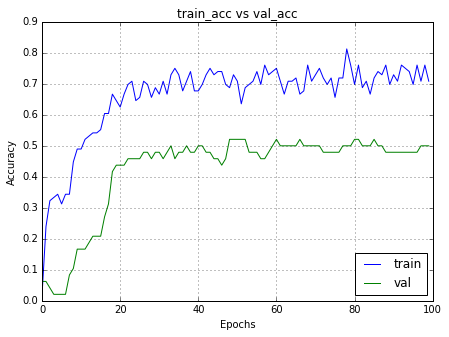

In [27]:
pp=PdfPages("E:Dataset_Final(March)/Checkpoints/Level_1/Epoch_101/Figure/Accuracy.pdf")
plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
plt.savefig(pp, format='pdf')
pp.close()